<a href="https://colab.research.google.com/github/agauravkishore/Neural-Networks---Image-classification---Cifar-10-Dataset/blob/master/Neural_Networks_Image_classification_Cifar_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing hte required libraries
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from sklearn.model_selection import train_test_split
import numpy as np


from keras import layers
from keras import models 
from keras import optimizers
from keras.layers import Dropout, Conv2D, Flatten, Dense
    
from keras.models import Sequential
from keras.optimizers import Adam
from keras import callbacks
K.tensorflow_backend.set_image_dim_ordering('tf')


from keras.utils import np_utils

In [0]:
import matplotlib.pyplot as plt

In [0]:
#importing the cifar10 dataset
from keras.datasets import cifar10

In [0]:
#Spliting into train_outer data and test data
(x_train_outer, y_train_outer), (x_test, y_test) = cifar10.load_data()

In [0]:
#Splitting train_outer into training data and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_outer, y_train_outer, test_size=0.2)


In [0]:
print(x_train.shape)
print(y_train_outer.shape)

print(x_test.shape)

print(y_test.shape)


(40000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


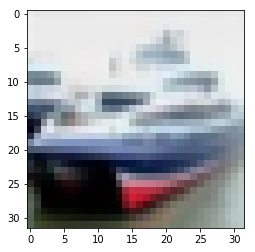

In [0]:
plt.imshow(x_test[1])

In [0]:
#normalizing data since the pixel values go from 0 to 256, we want value to be as small as possible

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
 
# mean-std normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))

mean_val = np.mean(x_val,axis=(0,1,2,3))
std_val = np.std(x_val,axis=(0,1,2,3))

mean_test = np.mean(x_test,axis=(0,1,2,3))
std_test = np.std(x_test,axis=(0,1,2,3))


x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean_test)/(std_test+1e-7)
x_val = (x_val-mean_val)/(std_val+1e-7)



In [0]:
#defining the classes for the outputs

n_classes = 10
y_train = np_utils.to_categorical(y_train,n_classes)
y_val = np_utils.to_categorical(y_val,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)


In [0]:
print(y_test.shape)
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)


(10000, 10)
(10000, 32, 32, 3)
(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [0]:
input_shape=(32, 32, 3)

In [0]:
#BASIC Model

model_b = models.Sequential()
model_b.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same',
                        input_shape=input_shape))

model_b.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))

model_b.add(layers.Flatten())
model_b.add(Dense(512, activation='relu'))
model_b.add(layers.Dense(n_classes, activation='softmax'))

In [0]:
#Applying an optimizer and compiling the model
AdamOpt = Adam(lr=0.001)
model_b.compile(optimizer=AdamOpt, loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [0]:
#Fitting the model onto the dataset 
history = model_b.fit(x_train, y_train, epochs = 10, batch_size = 150, 
                    validation_data = (x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 46s 1ms/step - loss: 1.7754 - acc: 0.4330 - val_loss: 1.2832 - val_acc: 0.5340
Epoch 2/10
40000/40000 [==============================] - 44s 1ms/step - loss: 1.0434 - acc: 0.6320 - val_loss: 1.0982 - val_acc: 0.6124
Epoch 3/10
40000/40000 [==============================] - 44s 1ms/step - loss: 0.7116 - acc: 0.7527 - val_loss: 1.0235 - val_acc: 0.6502
Epoch 4/10
40000/40000 [==============================] - 44s 1ms/step - loss: 0.3869 - acc: 0.8725 - val_loss: 1.1911 - val_acc: 0.6425
Epoch 5/10
40000/40000 [==============================] - 44s 1ms/step - loss: 0.1299 - acc: 0.9623 - val_loss: 1.5606 - val_acc: 0.6400
Epoch 6/10
40000/40000 [==============================] - 44s 1ms/step - loss: 0.0365 - acc: 0.9919 - val_loss: 1.7633 - val_acc: 0.6421
Epoch 7/10
40000/40000 [==============================] - 44s 1ms/step - loss: 0.0142 - acc: 0.9974 - val_loss: 1.9511 - val_acc

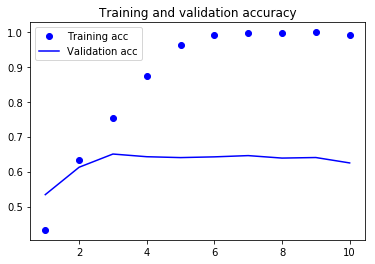

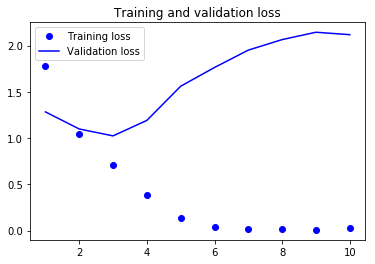

In [0]:
#Plotting the Accuracies
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Evaluating the model on the test dataset
classes = model_b.evaluate(x_test, y_test, verbose=1)

print('Test accuracy:', classes[1])
print('Test loss:', classes[0])

10000/10000 [==============================] - 3s 327us/step
Test accuracy: 0.6224
Test loss: 2.1438206899642944


In [0]:
#Building on the basic model to build a convolutional neural network with several convolution, pooling, and batch
#normalization layers. Then, flattening the output of the convolution layers and passing it to a single
#dense layer that will produce the output using softmax activation. Using
#categorical_crossentropy loss.


Build a basic convolutional neural network with several convolution, pooling, and batch
normalization layers. Flatten the output of the convolution layers and pass it to a single
dense layer that will produce the output using softmax activation. Use
categorical_crossentropy loss.


In [0]:
input_shape=(32, 32, 3)

In [0]:
#THE Final Model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same',
                        input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.4))


model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(n_classes, activation='softmax'))

# We add n_classes because we want the probability of each image belonging to a specific class



In [0]:
AdamOpt = Adam(lr=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [0]:
"""
model.compile(loss = 'categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'] )
              
optimizer above works better

"""

In [0]:
#for original
history = model.fit(x_train, y_train, epochs = 30, batch_size = 150, 
                    validation_data = (x_val, y_val))



Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 9s 222us/step - loss: 1.7506 - acc: 0.3582 - val_loss: 1.3736 - val_acc: 0.5174
Epoch 2/30
40000/40000 [==============================] - 8s 191us/step - loss: 1.3572 - acc: 0.5075 - val_loss: 1.1699 - val_acc: 0.5923
Epoch 3/30
40000/40000 [==============================] - 8s 192us/step - loss: 1.2032 - acc: 0.5676 - val_loss: 1.0881 - val_acc: 0.6178
Epoch 4/30
40000/40000 [==============================] - 8s 193us/step - loss: 1.1033 - acc: 0.6062 - val_loss: 0.9680 - val_acc: 0.6715
Epoch 5/30
40000/40000 [==============================] - 8s 192us/step - loss: 1.0282 - acc: 0.6350 - val_loss: 0.8883 - val_acc: 0.6940
Epoch 6/30
40000/40000 [==============================] - 8s 192us/step - loss: 0.9653 - acc: 0.6583 - val_loss: 0.8306 - val_acc: 0.7126
Epoch 7/30
40000/40000 [==============================] - 8s 191us/step - loss: 0.9253 - acc: 0.6707 - val_loss: 0.7938 - 

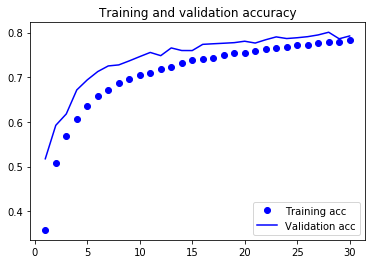

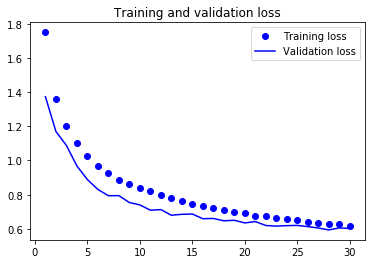

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Evaluating the model on the test dataset
classes = model.evaluate(x_test, y_test, verbose=1)

print('Test accuracy:', classes[1])
print('Test loss:', classes[0])

10000/10000 [==============================] - 1s 131us/step
Test accuracy: 0.7868
Test loss: 0.6227487847328186


Epoch 1/30
10000/10000 [==============================] - 2s 196us/step - loss: 0.9103 - acc: 0.6812
Epoch 2/30
10000/10000 [==============================] - 2s 181us/step - loss: 0.8881 - acc: 0.6909
Epoch 3/30
10000/10000 [==============================] - 2s 177us/step - loss: 0.8643 - acc: 0.6994
Epoch 4/30
10000/10000 [==============================] - 2s 174us/step - loss: 0.8675 - acc: 0.6983
Epoch 5/30
10000/10000 [==============================] - 2s 175us/step - loss: 0.8495 - acc: 0.7052
Epoch 6/30
10000/10000 [==============================] - 2s 171us/step - loss: 0.8409 - acc: 0.7027
Epoch 7/30
10000/10000 [==============================] - 2s 173us/step - loss: 0.8259 - acc: 0.7125
Epoch 8/30
10000/10000 [==============================] - 2s 174us/step - loss: 0.8097 - acc: 0.7156
Epoch 9/30
10000/10000 [==============================] - 2s 171us/step - loss: 0.8188 - acc: 0.7123
Epoch 10/30
10000/10000 [==============================] - 2s 174us/step - loss: 0.8139 - a

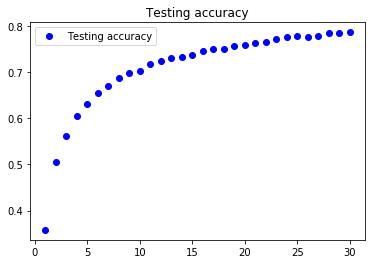

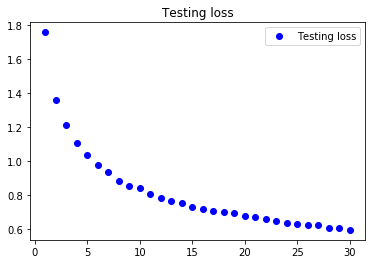

In [0]:
# Plotting the test accuracy and loss function

import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Testing accuracy')
plt.title('Testing accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Testing loss')
plt.title('Testing loss')
plt.legend()
plt.show()
